In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [53]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
df.shape

(7043, 21)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [56]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [57]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#churn_df = df[['gender','Partner','Dependents','PhoneService','MultipleLines',
 #       'InternetService','OnlineBackup','OnlineSecurity','DeviceProtection',
  #      'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling'
    #    ,'PaymentMethod']]
df['gender'] = label_encoder.fit_transform(df['gender'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'])
df['InternetService'] = label_encoder.fit_transform(df['InternetService'])
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'])
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'])
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'])
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [58]:
df.drop(['customerID'],axis = 1,inplace = True)

In [59]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [60]:
df['TotalCharges'].isnull().value_counts()

TotalCharges
False    7032
True       11
Name: count, dtype: int64

In [61]:
df1 = df.dropna(subset = ['TotalCharges'])
df1.shape

(7032, 20)

In [62]:
from sklearn.feature_selection import chi2
X1 = df1.drop('Churn',axis=1)
Y1 = df1[['Churn']]

In [63]:
chi_scores = chi2(X1,Y1)
chi_scores

(array([2.54297062e-01, 1.33482766e+02, 8.18577694e+01, 1.31271509e+02,
        1.63773281e+04, 9.29483891e-02, 9.73596015e+00, 9.71526930e+00,
        5.50437364e+02, 2.29441123e+02, 1.90688004e+02, 5.22164716e+02,
        7.37323437e+00, 8.35762354e+00, 1.11175905e+03, 1.04979224e+02,
        5.92405068e+01, 3.65307468e+03, 6.29630810e+05]),
 array([6.14065505e-001, 7.08954608e-031, 1.46240915e-019, 2.15953960e-030,
        0.00000000e+000, 7.60461827e-001, 1.80697601e-003, 1.82743300e-003,
        1.01122019e-121, 7.89268942e-052, 2.24986316e-043, 1.43080694e-115,
        6.62017569e-003, 3.84072535e-003, 9.18615368e-244, 1.23423173e-024,
        1.39531849e-014, 0.00000000e+000, 0.00000000e+000]))

In [64]:
p_values = pd.Series(chi_scores[1],index = X1.columns)
p_values.sort_values(ascending = False , inplace = True)

<Axes: >

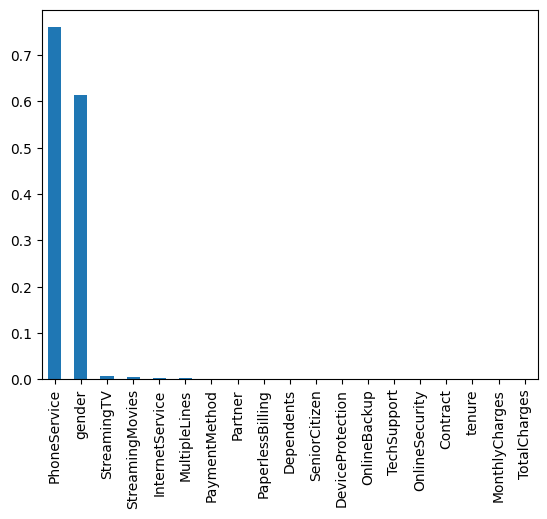

In [65]:
p_values.plot.bar()

Since Phone Service and Gender has higher the p-value, it says that this variables is independent of the response and can not be considered for model training

In [66]:
df_1 = df1[['PhoneService','Churn']]
df_1.corr()

,PhoneService,Churn
PhoneService,1.000000,0.011691
Churn,0.011691,1.000000


In [67]:
df_2 = df1[['gender','Churn']]
df_2.corr()

,gender,Churn
gender,1.000000,-0.008545
Churn,-0.008545,1.000000


In [68]:
df1.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


In [69]:
# Features we choose based on feature selection
X2 = X1.drop(['PhoneService','gender'],axis = 1)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y1, test_size=0.33, random_state=42)

In [71]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [72]:
yhat = clf.predict(X_test)
yhat[:5]

array([0, 0, 1, 0, 0])

In [87]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
print("Accuracy:",metrics.accuracy_score(Y_test, yhat))
Tree_JaccardIndex = jaccard_score(Y_test, yhat)
Tree_F1_Score = f1_score(Y_test, yhat)
print("Tree_JaccardIndex", Tree_JaccardIndex)
print("Tree_F1_Score", Tree_F1_Score)

Accuracy: 0.7824213700990952
Tree_JaccardIndex 0.301521438450899
Tree_F1_Score 0.46333687566418696


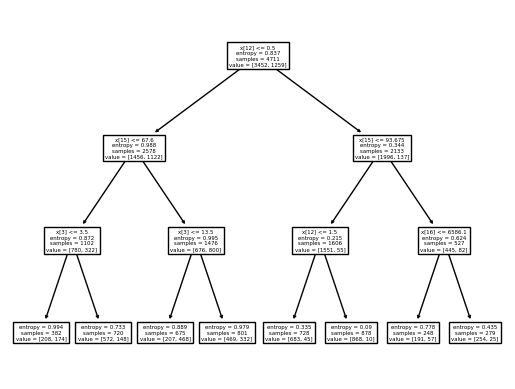

In [74]:
import matplotlib.pyplot as plt
tree.plot_tree(clf,max_depth = 3)
plt.show()

In [75]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_12 <= 0.50
|   |--- feature_15 <= 67.60
|   |   |--- feature_3 <= 3.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  3.50
|   |   |   |--- class: 0
|   |--- feature_15 >  67.60
|   |   |--- feature_3 <= 13.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  13.50
|   |   |   |--- class: 0
|--- feature_12 >  0.50
|   |--- feature_15 <= 93.67
|   |   |--- feature_12 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  1.50
|   |   |   |--- class: 0
|   |--- feature_15 >  93.67
|   |   |--- feature_16 <= 6586.10
|   |   |   |--- class: 0
|   |   |--- feature_16 >  6586.10
|   |   |   |--- class: 0



**Now let's us try more predictive machine learning models**

In [76]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
yhat_LR_proba = LR.predict_proba(X_test)
yhat_LR_proba[:5]

array([[0.99502529, 0.00497471],
       [0.8314293 , 0.1685707 ],
       [0.22535471, 0.77464529],
       [0.86386362, 0.13613638],
       [0.70409502, 0.29590498]])

In [82]:
yhat_LR_predict = LR.predict(X_test)
yhat_LR_predict[:5]

array([0, 0, 1, 0, 0])

In [91]:
from sklearn.metrics import log_loss
LR_Accuracy_Score = metrics.accuracy_score(Y_test, yhat_LR_predict)
LR_JaccardIndex = jaccard_score(Y_test, yhat_LR_predict)
LR_F1_Score = f1_score(Y_test, yhat_LR_predict)
LR_Log_Loss = log_loss(Y_test, yhat_LR_proba)
print("LR_Accuracy_Score",LR_Accuracy_Score )
print("LR_JaccardIndex", LR_JaccardIndex)
print("LR_F1_Score", LR_F1_Score)
print("LR_Log_Loss", LR_Log_Loss)

LR_Accuracy_Score 0.7940542869452822
LR_JaccardIndex 0.40914709517923364
LR_F1_Score 0.5807017543859648
LR_Log_Loss 0.4272087496602241


In [83]:
#Let us also develop and maintain SVM classification model
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [84]:
yhat_svm = SVM.predict(X_test)
yhat_svm[:5]

array([0, 0, 0, 0, 0])

In [92]:
SVM_Accuracy_Score = metrics.accuracy_score(Y_test,yhat_svm )
SVM_JaccardIndex = jaccard_score(Y_test, yhat_svm)
SVM_F1_Score = f1_score(Y_test, yhat_svm)
print("SVM_Accuracy_Score",SVM_Accuracy_Score )
print("SVM_JaccardIndex", SVM_JaccardIndex)
print("SVM_F1_Score", SVM_F1_Score)

SVM_Accuracy_Score 0.7371822490305903
SVM_JaccardIndex 0.0
SVM_F1_Score 0.0


So by Developing and evaluating various models we can see that Logisttic Regression Gives the Best Accuracy hence we choose it as the Model of choice.